<a href="https://colab.research.google.com/github/lffalcao/mod_recomendacao/blob/main/Day9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Criar datasets

In [ ]:
df_review = pd.read_csv('/content/drive/MyDrive/Doc_colab/DNC_order_reviews_dataset.csv',index_col=0)

In [ ]:
df_products = pd.read_csv('/content/drive/MyDrive/Doc_colab/DNC_products_dataset.csv',index_col=0)

In [ ]:
df_itens = pd.read_csv('/content/drive/MyDrive/Doc_colab/DNC_order_items_dataset.csv',index_col=0)

In [ ]:
df_orders = pd.read_csv('/content/drive/MyDrive/Doc_colab/DNC_orders_dataset.csv',index_col=0)

#Análise exploratória - EDA

In [ ]:
df_review.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [ ]:
df_review.dtypes

review_id       object
order_id        object
review_score     int64
dtype: object

In [ ]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0


In [ ]:
df_products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [ ]:
df_itens.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [ ]:
df_itens.dtypes

order_id          object
order_item_id      int64
product_id        object
price            float64
dtype: object

In [ ]:
df_orders.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [ ]:
df_orders.dtypes

order_id        object
customer_id     object
order_status    object
dtype: object

#Juntando as tabelas

In [ ]:
#Junção df products e df itens
df2= df_products.merge(df_itens, on='product_id' ,how = 'left')

In [ ]:
df2.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90


In [ ]:
#Junção df2 + orders
df3= df2.merge(df_orders, on='order_id' ,how = 'left')

In [ ]:
df3.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,price,customer_id,order_status
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,delivered
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,delivered
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,delivered
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,delivered
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,delivered


In [ ]:
#Junção df3 + review para formar o df final que possui todos os dados
df_final = df3.merge(df_review, on='order_id' ,how = 'left')

In [ ]:
df_final.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,price,customer_id,order_status,review_id,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,d71da8fd8c6e3adef26be965f065b8a1,5.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,delivered,19866247db89845ef558ef19a6c26fcd,5.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,delivered,32921b4e09c9a19d61fe46ce04231b84,5.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,delivered,70949d129965fb1ee32aaccec720a19e,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,delivered,74c9c7d0bc153bbbc92e4c1597b8ba55,5.0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  113314 non-null  object 
 1   product_category_name       111702 non-null  object 
 2   product_name_lenght         111702 non-null  float64
 3   product_description_lenght  111702 non-null  float64
 4   product_weight_g            113296 non-null  float64
 5   product_length_cm           113296 non-null  float64
 6   product_height_cm           113296 non-null  float64
 7   product_width_cm            113296 non-null  float64
 8   order_id                    113314 non-null  object 
 9   order_item_id               113314 non-null  int64  
 10  price                       113314 non-null  float64
 11  customer_id                 113314 non-null  object 
 12  order_status                113314 non-null  object 
 13  review_id     

In [ ]:
df_final.shape

(113314, 15)

In [ ]:
df_final.dropna(axis=0,inplace=True)

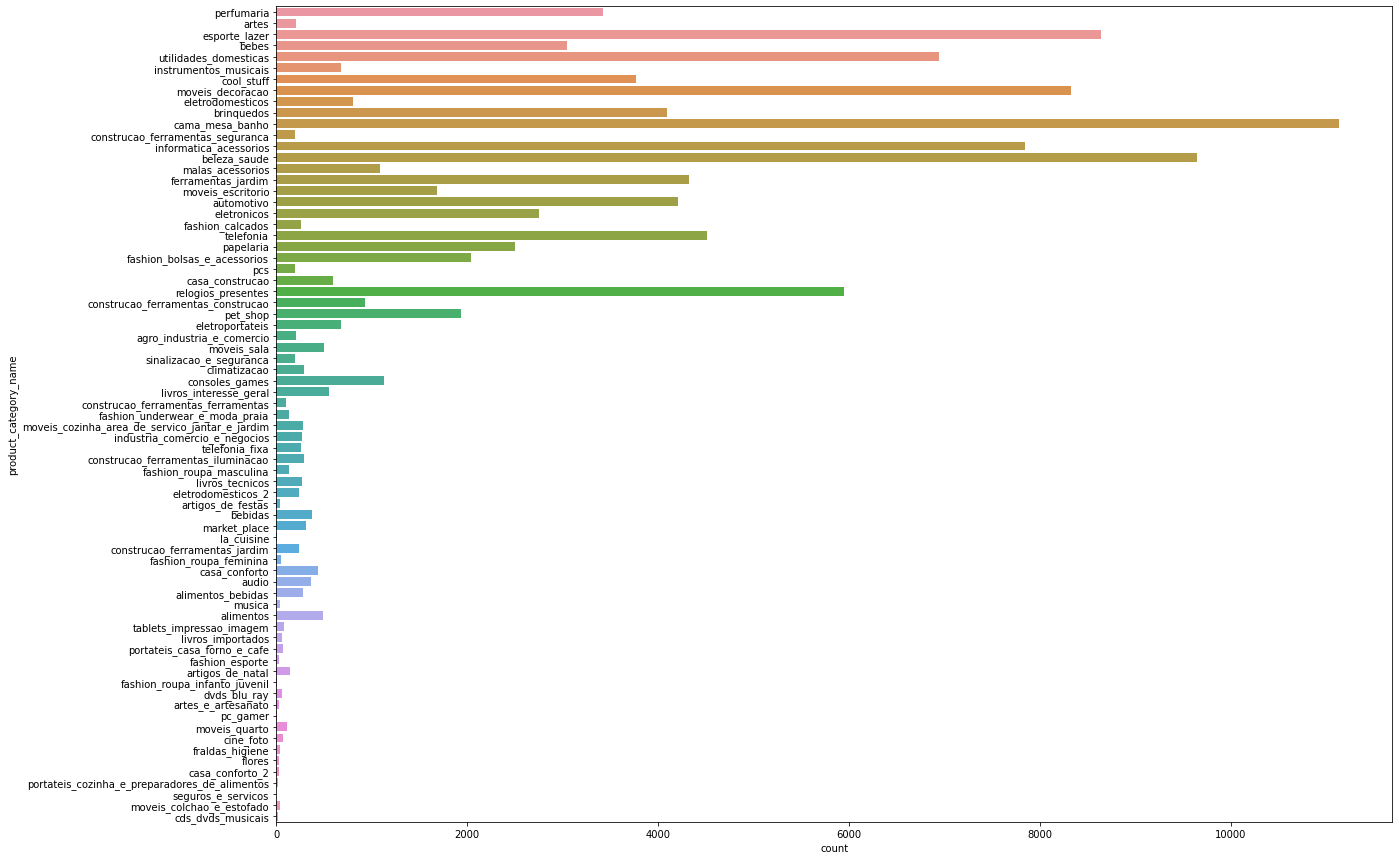

In [ ]:
plt.figure(figsize = (20,15))
sns.countplot(y= 'product_category_name', data=df_final)

In [ ]:
df_final.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
order_id                      0
order_item_id                 0
price                         0
customer_id                   0
order_status                  0
review_id                     0
review_score                  0
dtype: int64

In [ ]:
df_final.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,review_score
count,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000
mean,48.777482,786.793226,2096.779143,30.209166,16.609147,23.046491,1.196384,120.482999,4.035225
std,10.025168,651.612397,3751.465382,16.174395,13.461482,11.716425,0.692829,181.828589,1.385420
min,5.000000,4.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.850000,1.000000
1%,21.000000,86.000000,75.000000,16.000000,2.000000,11.000000,1.000000,9.990000,1.000000
10%,33.000000,215.000000,150.000000,16.000000,4.000000,12.000000,1.000000,23.900000,1.000000
25%,42.000000,348.000000,300.000000,18.000000,8.000000,15.000000,1.000000,39.900000,4.000000
50%,52.000000,601.000000,700.000000,25.000000,13.000000,20.000000,1.000000,74.900000,5.000000
75%,57.000000,985.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,134.900000,5.000000
90%,59.000000,1586.000000,6250.000000,51.000000,31.000000,40.000000,2.000000,229.900000,5.000000


In [ ]:
df_final.describe(include='object')

,product_id,product_category_name,order_id,customer_id,order_status,review_id
count,110773,110773,110773,110773,110773,110773
unique,32183,73,96537,96537,7,96340
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,e8236fe7b6e1bdd513a500de361e2b87
freq,524,11137,22,22,108479,21


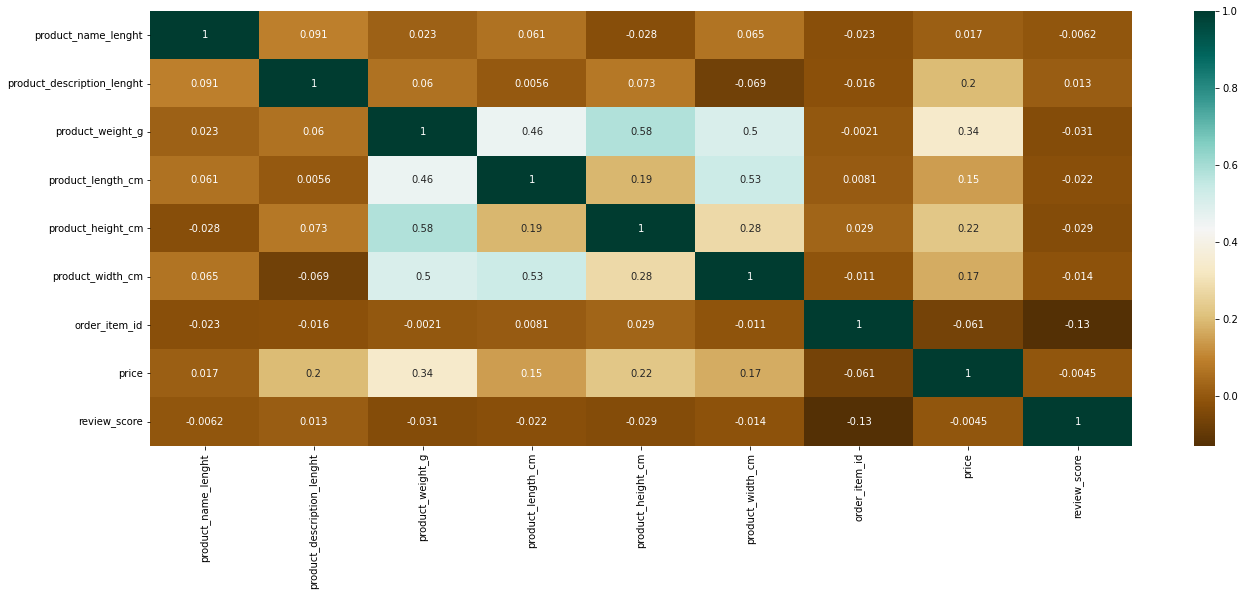

In [ ]:
plt.figure(figsize = (22,8))
sns.heatmap(df_final.corr(), annot=True,cmap='BrBG')
plt.show()

In [ ]:
df_final.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,price,customer_id,order_status,review_id,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,d71da8fd8c6e3adef26be965f065b8a1,5.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,delivered,19866247db89845ef558ef19a6c26fcd,5.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,delivered,32921b4e09c9a19d61fe46ce04231b84,5.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,delivered,70949d129965fb1ee32aaccec720a19e,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,delivered,74c9c7d0bc153bbbc92e4c1597b8ba55,5.0


In [ ]:

df_final['order_status'].value_counts()


delivered      108479
shipped          1084
canceled          515
invoiced          346
processing        339
unavailable         7
approved            3
Name: order_status, dtype: int64

In [ ]:
df_final['product_vol_cm3'] = df_final['product_length_cm']* df_final['product_width_cm']*df_final['product_height_cm']
df_final['product_vol_cm3']

0          2240.0
1         10800.0
2          2430.0
3          2704.0
4          4420.0
           ...   
113309     8060.0
113310     8060.0
113311     8060.0
113312     8060.0
113313      168.0
Name: product_vol_cm3, Length: 110773, dtype: float64

In [ ]:
df_final.drop(columns=['product_length_cm','product_width_cm','product_height_cm'],inplace=True)

In [ ]:
df_final.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,order_id,order_item_id,price,customer_id,order_status,review_id,review_score,product_vol_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,d71da8fd8c6e3adef26be965f065b8a1,5.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,delivered,19866247db89845ef558ef19a6c26fcd,5.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,delivered,32921b4e09c9a19d61fe46ce04231b84,5.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,delivered,70949d129965fb1ee32aaccec720a19e,1.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,delivered,74c9c7d0bc153bbbc92e4c1597b8ba55,5.0,4420.0


In [ ]:
#DataFrame com os produtos que possuem 150+ avaliacoes

df_final2 = df_final.groupby(['product_id']).filter(lambda x: x['review_score'].count()>= 150)
df_final2

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,order_id,order_item_id,price,customer_id,order_status,review_id,review_score,product_vol_cm3
2338,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,00404fa7a687c8c44ca69d42695aae73,1,99.9,0c34c39c897304ff49eeade3059c4c60,delivered,c1739c70298dbe46e21a825af2b984f1,5.0,2288.0
2339,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,011c899816ea29773525bd3322dbb6aa,1,99.9,c15a53f6fbae984bcbf4ac7bc4395cc3,delivered,f5abe05962e90915a4b48b2a12327ace,2.0,2288.0
2340,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,047d317db3c34ff477eee816660e44f0,1,134.9,e7b450488b37ccb78581bc78df2bd066,delivered,9498aa266b5eab3b1f29fa34d987cf99,4.0,2288.0
2342,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,04af63a78c7e84943b8377fe1b7871aa,1,115.0,cc2799fcab7375793ea883dbed8a3141,delivered,73f25fd56481b57c3e61732813725a51,5.0,2288.0
2343,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,0517a3e68dac3308995edca2144db36e,1,99.9,17b05621a4b0481d008669e0a474b984,delivered,98227f0ca1372b30413360b44ebe3e59,1.0,2288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110787,42a2c92a0979a949ca4ea89ec5c7b934,utilidades_domesticas,41.0,799.0,7000.0,fc5a67aa2d57b1764a89718edf876006,1,58.9,8e9822c8af9cbf8b5ea51a9ce0ca9eb1,delivered,5763afb7c13ba4ab11ba1266c07397bb,5.0,32994.0
110788,42a2c92a0979a949ca4ea89ec5c7b934,utilidades_domesticas,41.0,799.0,7000.0,fc9bc4bac939adaa600ad59dee9a106f,1,59.9,566bf9470ea51d6f6d0d05be06323576,delivered,74e6fb25a77ecb6d13268a02ed12319b,5.0,32994.0
110789,42a2c92a0979a949ca4ea89ec5c7b934,utilidades_domesticas,41.0,799.0,7000.0,fceb38f42fbf13b53a6253648c8d47cf,1,59.9,d5c38f60d37fed94adf6911209686a32,delivered,fffd68e8a9fb73a56a2f504011b0f1f1,1.0,32994.0
110790,42a2c92a0979a949ca4ea89ec5c7b934,utilidades_domesticas,41.0,799.0,7000.0,fdcc8d62390289b2bda3229c41e961ec,1,58.9,a38d868a3f9c5489968a012d9dbc60a2,delivered,1688ae8060eca263f0a30add541b4f70,5.0,32994.0


In [ ]:
#Análise dos produtos, mais pedidos e mais vendidos 
df_prod_vendido = pd.DataFrame(df_final2.groupby(['product_id'])['order_status'].value_counts().sort_values(ascending = False)).head(25)
df_prod_vendido


,,order_status
product_id,order_status,
aca2eb7d00ea1a7b8ebd4e68314663af,delivered,517
422879e10f46682990de24d770e7f83d,delivered,486
99a4788cb24856965c36a24e339b6058,delivered,472
389d119b48cf3043d311335e499d9c6b,delivered,389
368c6c730842d78016ad823897a372db,delivered,388
53759a2ecddad2bb87a079a1f1519f73,delivered,373
d1c427060a0f73f6b889a5c7c61f2ac4,delivered,330
53b36df67ebb7c41585e8d54d6772e08,delivered,319
154e7e31ebfa092203795c972e5804a6,delivered,284


In [ ]:
#Produto melhor classificado
df_classificado = pd.DataFrame(df_final2.groupby(['product_id'])['review_score'].value_counts().sort_values(ascending = True)).head(25)
df_classificado.rename(columns={'review_score':'quantidade_avaliacao'},inplace=True)
df_classificado


,,quantidade_avaliacao
product_id,review_score,
3dd2a17168ec895c781a9191c1e95ad7,2.0,3
437c05a395e9e47f9762e677a7068ce7,2.0,3
35afc973633aaeb6b877ff57b2793310,2.0,3
bb50f2e236e5eea0100680137654686c,2.0,4
d1c427060a0f73f6b889a5c7c61f2ac4,2.0,4
f1c7f353075ce59d8a6f3cf58f419c9c,1.0,4
6cdd53843498f92890544667809f1595,2.0,5
f1c7f353075ce59d8a6f3cf58f419c9c,2.0,5
19c91ef95d509ea33eda93495c4d3481,2.0,6


In [ ]:
df_classificado2 = pd.DataFrame(df_final2.groupby(['product_id'])['review_score'].mean().sort_values(ascending = False)).head(25)
df_classificado2.rename(columns={'review_score':'quantidade_avaliacao'}, inplace= True)
df_classificado2

,quantidade_avaliacao
product_id,
f1c7f353075ce59d8a6f3cf58f419c9c,4.375000
6cdd53843498f92890544667809f1595,4.316129
154e7e31ebfa092203795c972e5804a6,4.315068
bb50f2e236e5eea0100680137654686c,4.224490
3dd2a17168ec895c781a9191c1e95ad7,4.209559
d1c427060a0f73f6b889a5c7c61f2ac4,4.194118
53b36df67ebb7c41585e8d54d6772e08,4.190625
437c05a395e9e47f9762e677a7068ce7,4.175325
389d119b48cf3043d311335e499d9c6b,4.117647


In [ ]:
#Verificando número avaliações dos clientes
df_final2['customer_id'].value_counts()

d5f2b3f597c7ccafbb5cac0bcc3d6024    14
91f92cfee46b79581b05aa974dd57ce5    12
0d554604c3b40dee69eca5c62176f905     6
fefe47950f42fddc66afdf7315a36dae     6
ebfafa93320c769d9b60740fbc5cad2f     6
                                    ..
b663fad935d54a48a276dad2482e5732     1
91cbdb19cc0cb23e62b4f291f0c1e41e     1
5d4134c9ae17d09b86aa4387c2e9b6e6     1
02d22b2dd08fd5b4bb3ebac28f73d68c     1
9edc52a63f14b6e1d5377cdd3a5b5f6d     1
Name: customer_id, Length: 5507, dtype: int64

In [ ]:
df_avalia = pd.DataFrame(df_final2.groupby(['customer_id'])['review_score'].value_counts().sort_values(ascending = False)).head(25)
df_avalia.rename(columns={'review_score':'Quantidade_avaliacao'})

,,Quantidade_avaliacao
customer_id,review_score,
d5f2b3f597c7ccafbb5cac0bcc3d6024,1.0,14
91f92cfee46b79581b05aa974dd57ce5,1.0,12
424bb0b58d2a1f8f1a185d44a8116aae,3.0,6
fefe47950f42fddc66afdf7315a36dae,4.0,6
c799766de6042338158b08fc7418df09,5.0,6
2ed8567c7952b9d78d2cda0a0679dd6f,2.0,6
0d554604c3b40dee69eca5c62176f905,1.0,6
679f84ceb2ee4ca5bca0c3ea34647746,5.0,6
61e64c5257a4101a66a2e65228e1191a,2.0,5


In [ ]:
#Checando se o usuário que teve a maior quantidade de avaliações realmente avaliou tudo como 1.
df_final.loc[df_final['customer_id']== 'be1c4e52bb71e0c54b11a26b8e8d59f2']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,order_id,order_item_id,price,customer_id,order_status,review_id,review_score,product_vol_cm3
18683,d25bbb182b51d1594fe3b54a27ae143e,cama_mesa_banho,34.0,308.0,1900.0,5a3b1c29a49756e75f1ef513383c0c12,7,69.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,27c23f74895a5643693407f4618d18fd,1.0,40020.0
18684,d25bbb182b51d1594fe3b54a27ae143e,cama_mesa_banho,34.0,308.0,1900.0,5a3b1c29a49756e75f1ef513383c0c12,7,69.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,e8f500e8052dd5fac20fee5a8c880367,1.0,40020.0
18685,d25bbb182b51d1594fe3b54a27ae143e,cama_mesa_banho,34.0,308.0,1900.0,5a3b1c29a49756e75f1ef513383c0c12,10,69.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,27c23f74895a5643693407f4618d18fd,1.0,40020.0
18686,d25bbb182b51d1594fe3b54a27ae143e,cama_mesa_banho,34.0,308.0,1900.0,5a3b1c29a49756e75f1ef513383c0c12,10,69.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,e8f500e8052dd5fac20fee5a8c880367,1.0,40020.0
51501,6a0713a63e990052795623e76cc2995e,cama_mesa_banho,31.0,151.0,900.0,5a3b1c29a49756e75f1ef513383c0c12,4,72.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,27c23f74895a5643693407f4618d18fd,1.0,4800.0
51502,6a0713a63e990052795623e76cc2995e,cama_mesa_banho,31.0,151.0,900.0,5a3b1c29a49756e75f1ef513383c0c12,4,72.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,e8f500e8052dd5fac20fee5a8c880367,1.0,4800.0
68880,17d8b8e9c21ec0fc5b33724e32fe422e,cama_mesa_banho,26.0,212.0,1000.0,5a3b1c29a49756e75f1ef513383c0c12,2,58.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,27c23f74895a5643693407f4618d18fd,1.0,4800.0
68881,17d8b8e9c21ec0fc5b33724e32fe422e,cama_mesa_banho,26.0,212.0,1000.0,5a3b1c29a49756e75f1ef513383c0c12,2,58.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,e8f500e8052dd5fac20fee5a8c880367,1.0,4800.0
88178,e95fb3a80ca294f39de925b6428f3a32,cama_mesa_banho,29.0,263.0,1300.0,5a3b1c29a49756e75f1ef513383c0c12,8,78.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,27c23f74895a5643693407f4618d18fd,1.0,11286.0
88179,e95fb3a80ca294f39de925b6428f3a32,cama_mesa_banho,29.0,263.0,1300.0,5a3b1c29a49756e75f1ef513383c0c12,8,78.90,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,e8f500e8052dd5fac20fee5a8c880367,1.0,11286.0


In [ ]:
df_score = pd.DataFrame(df_final2.groupby(['product_id'])['review_score'].mean().sort_values(ascending = False))
df_score.rename(columns={'review_score':'media_avaliacao'}, inplace=True)
df_score

,media_avaliacao
product_id,
f1c7f353075ce59d8a6f3cf58f419c9c,4.375000
6cdd53843498f92890544667809f1595,4.316129
154e7e31ebfa092203795c972e5804a6,4.315068
bb50f2e236e5eea0100680137654686c,4.224490
3dd2a17168ec895c781a9191c1e95ad7,4.209559
d1c427060a0f73f6b889a5c7c61f2ac4,4.194118
53b36df67ebb7c41585e8d54d6772e08,4.190625
437c05a395e9e47f9762e677a7068ce7,4.175325
389d119b48cf3043d311335e499d9c6b,4.117647


In [ ]:
df_score['Quant_avaliacoes'] = df_final2.groupby(['product_id'])['review_score'].count()
df_score

,media_avaliacao,Quant_avaliacoes
product_id,,
f1c7f353075ce59d8a6f3cf58f419c9c,4.375000,152
6cdd53843498f92890544667809f1595,4.316129,155
154e7e31ebfa092203795c972e5804a6,4.315068,292
bb50f2e236e5eea0100680137654686c,4.224490,196
3dd2a17168ec895c781a9191c1e95ad7,4.209559,272
d1c427060a0f73f6b889a5c7c61f2ac4,4.194118,340
53b36df67ebb7c41585e8d54d6772e08,4.190625,320
437c05a395e9e47f9762e677a7068ce7,4.175325,154
389d119b48cf3043d311335e499d9c6b,4.117647,391


In [ ]:
#Vetorização dos 10 produtos melhores avaliados

df_score.sort_values(by='Quant_avaliacoes', ascending = False, inplace=True)
top_10 = df_score.head(10)
top_10

,media_avaliacao,Quant_avaliacoes
product_id,,
aca2eb7d00ea1a7b8ebd4e68314663af,4.019084,524
422879e10f46682990de24d770e7f83d,3.946502,486
99a4788cb24856965c36a24e339b6058,3.898340,482
389d119b48cf3043d311335e499d9c6b,4.117647,391
368c6c730842d78016ad823897a372db,3.922680,388
53759a2ecddad2bb87a079a1f1519f73,3.868633,373
d1c427060a0f73f6b889a5c7c61f2ac4,4.194118,340
53b36df67ebb7c41585e8d54d6772e08,4.190625,320
154e7e31ebfa092203795c972e5804a6,4.315068,292


In [ ]:
#Definindo parâmetros da média ponderada

#Quantidade média de avaliacoes
qma = df_classificado['quantidade_avaliacao'].mean()
print(f'A qma é {qma} \f')

#Média global das notas
mgn = df_final2['review_score'].mean()
print(f'A mgn é {mgn} \f')

#Média Global 
c = df_score['media_avaliacao'].mean()
print(f'O c é {c} \f')

#Limite 
m = df_score['Quant_avaliacoes'].min()
print(f'O m é {m} \f')






A qma é 7.4 
A mgn é 4.0088276289298435 
O c é 4.005795278058113 
O m é 152 


In [ ]:
#Função média ponderadra

def media_pond (x,m=m, c=c):
  v = x['Quant_avaliacoes']
  R = x['media_avaliacao']

  return (v/(v+m)*R) + (m/(m+v) * c)


In [ ]:
df_score['score'] = df_score.apply(media_pond,axis=1)

In [ ]:
df_score.sort_values(by='score', ascending = False,inplace = True)

In [ ]:
df_score.head(10)

,media_avaliacao,Quant_avaliacoes,score
product_id,,,
154e7e31ebfa092203795c972e5804a6,4.315068,292,4.209191
f1c7f353075ce59d8a6f3cf58f419c9c,4.375000,152,4.190398
6cdd53843498f92890544667809f1595,4.316129,155,4.162478
3dd2a17168ec895c781a9191c1e95ad7,4.209559,272,4.136512
d1c427060a0f73f6b889a5c7c61f2ac4,4.194118,340,4.135937
53b36df67ebb7c41585e8d54d6772e08,4.190625,320,4.131104
bb50f2e236e5eea0100680137654686c,4.224490,196,4.128968
437c05a395e9e47f9762e677a7068ce7,4.175325,154,4.091114
389d119b48cf3043d311335e499d9c6b,4.117647,391,4.086337


In [ ]:
top_10

,media_avaliacao,Quant_avaliacoes
product_id,,
aca2eb7d00ea1a7b8ebd4e68314663af,4.019084,524
422879e10f46682990de24d770e7f83d,3.946502,486
99a4788cb24856965c36a24e339b6058,3.898340,482
389d119b48cf3043d311335e499d9c6b,4.117647,391
368c6c730842d78016ad823897a372db,3.922680,388
53759a2ecddad2bb87a079a1f1519f73,3.868633,373
d1c427060a0f73f6b889a5c7c61f2ac4,4.194118,340
53b36df67ebb7c41585e8d54d6772e08,4.190625,320
154e7e31ebfa092203795c972e5804a6,4.315068,292


In [ ]:
#Criação do Modelo
# Importando pacotes
!pip install surprise
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

In [ ]:
df_final2.shape

(6457, 13)

In [ ]:
df_score.shape

(24, 3)

In [ ]:
df_final2.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_weight_g', 'order_id',
       'order_item_id', 'price', 'customer_id', 'order_status', 'review_id',
       'review_score', 'product_vol_cm3'],
      dtype='object')

In [ ]:
#Lendo o dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final2[['product_id', 'customer_id', 'review_score']], reader) 

In [ ]:
# Split dos dados
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [ ]:
# Criação de um modelo baseado em item (user_based true / 
#false para alternar entre filtragem colaborativa baseada em usuário ou baseada em item)

recomendacao = KNNWithMeans(k=5, sim_options={'user_based': False, 'name':'cosine'})
recomendacao.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# Teste do modelo
test_pred = recomendacao.test(testset)

In [ ]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.1840


1.1840243272724138

In [ ]:
#Descobrindo os itens recomendados
recomendacao.get_neighbors(1,10)

[10, 118, 132, 144, 155, 166, 198, 229, 239, 269]

In [ ]:
df_final2.iloc[[10, 118, 132, 144, 155, 166, 198, 229, 239, 269]].index

Int64Index([2349, 2457, 2472, 2484, 2495, 2506, 2539, 2570, 2580, 2610], dtype='int64')

In [ ]:
df_final2.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,order_id,order_item_id,price,customer_id,order_status,review_id,review_score,product_vol_cm3
2338,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,00404fa7a687c8c44ca69d42695aae73,1,99.9,0c34c39c897304ff49eeade3059c4c60,delivered,c1739c70298dbe46e21a825af2b984f1,5.0,2288.0
2339,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,011c899816ea29773525bd3322dbb6aa,1,99.9,c15a53f6fbae984bcbf4ac7bc4395cc3,delivered,f5abe05962e90915a4b48b2a12327ace,2.0,2288.0
2340,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,047d317db3c34ff477eee816660e44f0,1,134.9,e7b450488b37ccb78581bc78df2bd066,delivered,9498aa266b5eab3b1f29fa34d987cf99,4.0,2288.0
2342,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,04af63a78c7e84943b8377fe1b7871aa,1,115.0,cc2799fcab7375793ea883dbed8a3141,delivered,73f25fd56481b57c3e61732813725a51,5.0,2288.0
2343,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,33.0,523.0,584.0,0517a3e68dac3308995edca2144db36e,1,99.9,17b05621a4b0481d008669e0a474b984,delivered,98227f0ca1372b30413360b44ebe3e59,1.0,2288.0


In [ ]:
valores = [10, 118, 132, 144, 155, 166, 198, 229, 239, 269]
lista = ['53b36df67ebb7c41585e8d54d6772e08','53b36df67ebb7c41585e8d54d6772e08']

for a in valores:
 df_final2.iloc[a]
 if 
 

for b in lista:


In [ ]:
df_final2.iloc[132]

product_id                    53b36df67ebb7c41585e8d54d6772e08
product_category_name                       relogios_presentes
product_name_lenght                                       33.0
product_description_lenght                               523.0
product_weight_g                                         584.0
order_id                      72520be5b5b4c32b2ada295436e4472e
order_item_id                                                1
price                                                    116.9
customer_id                   76e17b3467f6f930eaa9a1ce94ecf27a
order_status                                         delivered
review_id                     8db14a011caa605764238c71d5e711c9
review_score                                               5.0
product_vol_cm3                                         2288.0
Name: 2472, dtype: object

Definição do modelo -> Com a base de dados disponibilizada, quais modelos de recomendação podem ser feitos?

Resposta: De acordo com as bases, selecionamos os modelos KNNWithMeans, Dataset, accuracy e Reader, para realização dos testes.

Exploração dos dados -> O que os dados nos dizem? Quais são as hipóteses que podem ser levantadas disso? Será que os dados são suficientes para o modelo que se propôs a fazer?

Resposta: De acordo com os testes, os dados se mostraram suficientes para a proposta do modelo. As informações apresentadas mostram tipos de produtos, quantidade de compras por usuário e as notas que foram dadas para cada produto.

Estruturação dos dados -> Quais devem ser os dados de Treino? E os de Teste? Preciso juntar as informações entre as tabelas? 

Resposta: Fizemos o merge entre todas as bases que foram disponibilizadas.
O dataset foi separado em 70%/30% para teste e treino.

Tratamento -> Como pode ser feita a seleção e filtragem dos dados? Quais tratamentos devem ser feitos considerando os dados existentes?

Resposta: Realizamos os seguintes tratamentos: drop dos valores nulos, contagem dos dados, criação da coluna 'product_vol_cm3',
resultado da multiplicação entre as colunas 'product_length_cm', 'product_width_cm' e 'product_height_cm'.
Depois, separamos criamos um dataframe considerando apenas os produtos com mais de 150 avaliações, analisamos os produtos 
mais pedidos e mais vendidos, bem como do produto que ficou melhor classificado.
Depois, foi feita a verificação do número de avaliações por cliente, checagem e validação das avaliações realizadas
pelo usuário 'be1c4e52bb71e0c54b11a26b8e8d59f2' (este usuário chamou a atenção por ter avaliado 14 produtos com a 
nota mais baixa). Foi feita a vetorização dos 10 produtos mais bem avaliados, depois a definição da média ponderada
e por fim a criação do modelo.

Criação do modelo -> Desenvolva o modelo!

Resposta: Desenvolvemos os modelos KNNWithMeans e Reader.